### Importing the libraries

In [169]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

### Loading the train dataset

In [62]:
income=pd.read_csv('C:/Users/siddharth21.TRN/Downloads/Mock_QP_-_Reg/train.csv')
income

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.000000,121.000000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.000000,121.000000,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.000000,100.000000,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.000000,100.000000,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.000000,100.000000,784,4


### Preprocessing

In [63]:
#There are 9557 rows and 143 columns. Big dataset

In [64]:
income.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [65]:
income.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [66]:
#Dataset is not standardised/normalised yet.

In [67]:
income['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

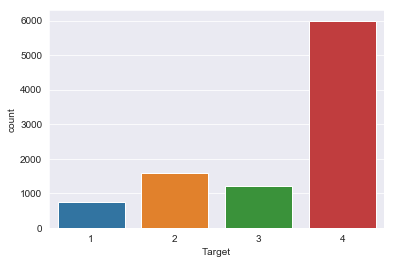

In [68]:
sb.countplot(income['Target'])

### Output variable is the 'Target' column 

In [69]:
income.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
                   ... 
bedrooms              0
overcrowding          0
tipovivi1             0
tipovivi2             0
tipovivi3             0
tipovivi4             0
tipovivi5             0
computer              0
television            0
mobilephone           0
qmobilephone    

### There are above 22,135 null values in total present in the dataset

In [70]:
u=income.loc[:,['v2a1','tipovivi1','tipovivi2','tipovivi3']]
u
#tipovivi1=1 means its a own house and fully paid.
#tipovivi2=1 means its a own house but paying in installments
#tipovivi3=1 means its a rented house


,v2a1,tipovivi1,tipovivi2,tipovivi3
0,190000.0,0,0,1
1,135000.0,0,0,1
2,NaN,1,0,0
3,180000.0,0,0,1
4,180000.0,0,0,1
5,180000.0,0,0,1
6,180000.0,0,0,1
7,130000.0,0,0,1
8,130000.0,0,0,1
9,130000.0,0,0,1


### v2a1 denotes the monthly rent payment by the households. We notice that out of 9557 entries(households) 6860 are null values

### Cross verifying with 'tipovivi 1' (ownership) columns we understand that 6860 null values denote that those houses are fully owned 

In [71]:
p=income['tipovivi2'].value_counts()
p

0    8596
1     961
Name: tipovivi2, dtype: int64

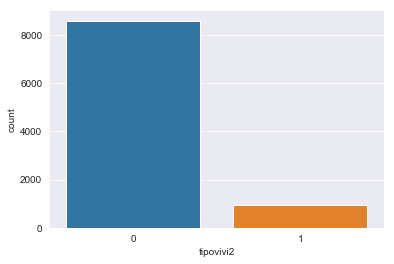

In [72]:
sb.countplot(income['tipovivi2'])

### We understand that 961 houses are fully owned but pay installments which is counted in house rents (v2a1 column)

In [73]:
income['v2a1'].isnull().sum()

6860

In [101]:
ni=income.loc[:,['v2a1','v14a','rooms','refrig','hhsize','r4t3','tamviv','paredblolad','paredzocalo','paredpreb','pareddes','pisomoscer','pisomadera','techozinc','noelec','cielorazo','abastaguano','etecho3','r4h3','r4m3','epared3','eviv3','dis','meaneduc','bedrooms','computer','television','mobilephone',
'area1','area2','age']]

In [102]:
income['area1'].value_counts()

1    6829
0    2728
Name: area1, dtype: int64

In [103]:
income['area2'].value_counts()

0    6829
1    2728
Name: area2, dtype: int64

#### It is given to us that with PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need.

#### Based on the above and column descriptions we have selected the below features which we think best summarise the household situation and are suited to improve PMT's performance

In [104]:
ni

,v2a1,v14a,rooms,refrig,hhsize,r4t3,tamviv,paredblolad,paredzocalo,paredpreb,...,eviv3,dis,meaneduc,bedrooms,computer,television,mobilephone,area1,area2,age
0,190000.0,1,3,1,1,1,1,1,0,0,...,0,0,10.000000,1,0,0,1,1,0,43
1,135000.0,1,4,1,1,1,1,0,0,0,...,0,0,12.000000,1,0,0,1,1,0,67
2,NaN,1,8,1,1,1,1,0,0,0,...,1,1,11.000000,2,0,0,0,1,0,92
3,180000.0,1,5,1,4,4,4,1,0,0,...,1,0,11.000000,3,0,0,1,1,0,17
4,180000.0,1,5,1,4,4,4,1,0,0,...,1,0,11.000000,3,0,0,1,1,0,37
5,180000.0,1,5,1,4,4,4,1,0,0,...,1,0,11.000000,3,0,0,1,1,0,38
6,180000.0,1,5,1,4,4,4,1,0,0,...,1,0,11.000000,3,0,0,1,1,0,8
7,130000.0,1,2,1,4,4,4,1,0,0,...,0,0,10.000000,1,0,0,1,1,0,7
8,130000.0,1,2,1,4,4,4,1,0,0,...,0,0,10.000000,1,0,0,1,1,0,30
9,130000.0,1,2,1,4,4,4,1,0,0,...,0,0,10.000000,1,0,0,1,1,0,28


In [105]:
ni.columns

Index(['v2a1', 'v14a', 'rooms', 'refrig', 'hhsize', 'r4t3', 'tamviv',
       'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'pisomoscer',
       'pisomadera', 'techozinc', 'noelec', 'cielorazo', 'abastaguano',
       'etecho3', 'r4h3', 'r4m3', 'epared3', 'eviv3', 'dis', 'meaneduc',
       'bedrooms', 'computer', 'television', 'mobilephone', 'area1', 'area2',
       'age'],
      dtype='object')

### We will also confirm these features by checking their variance and correlation

#### First we clean the feature dataset

In [106]:
ni.isnull().sum()

v2a1           6860
v14a              0
rooms             0
refrig            0
hhsize            0
r4t3              0
tamviv            0
paredblolad       0
paredzocalo       0
paredpreb         0
pareddes          0
pisomoscer        0
pisomadera        0
techozinc         0
noelec            0
cielorazo         0
abastaguano       0
etecho3           0
r4h3              0
r4m3              0
epared3           0
eviv3             0
dis               0
meaneduc          5
bedrooms          0
computer          0
television        0
mobilephone       0
area1             0
area2             0
age               0
dtype: int64

In [107]:
ni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 31 columns):
v2a1           2697 non-null float64
v14a           9557 non-null int64
rooms          9557 non-null int64
refrig         9557 non-null int64
hhsize         9557 non-null int64
r4t3           9557 non-null int64
tamviv         9557 non-null int64
paredblolad    9557 non-null int64
paredzocalo    9557 non-null int64
paredpreb      9557 non-null int64
pareddes       9557 non-null int64
pisomoscer     9557 non-null int64
pisomadera     9557 non-null int64
techozinc      9557 non-null int64
noelec         9557 non-null int64
cielorazo      9557 non-null int64
abastaguano    9557 non-null int64
etecho3        9557 non-null int64
r4h3           9557 non-null int64
r4m3           9557 non-null int64
epared3        9557 non-null int64
eviv3          9557 non-null int64
dis            9557 non-null int64
meaneduc       9552 non-null float64
bedrooms       9557 non-null int64
computer      

In [108]:
ni['v2a1'].fillna(0,inplace=True)

In [109]:
ni.isnull().sum()

v2a1           0
v14a           0
rooms          0
refrig         0
hhsize         0
r4t3           0
tamviv         0
paredblolad    0
paredzocalo    0
paredpreb      0
pareddes       0
pisomoscer     0
pisomadera     0
techozinc      0
noelec         0
cielorazo      0
abastaguano    0
etecho3        0
r4h3           0
r4m3           0
epared3        0
eviv3          0
dis            0
meaneduc       5
bedrooms       0
computer       0
television     0
mobilephone    0
area1          0
area2          0
age            0
dtype: int64

In [110]:
ni['meaneduc'].value_counts()

6.000000     846
11.000000    491
9.000000     398
8.500000     341
10.000000    330
7.000000     306
8.000000     306
7.500000     270
12.000000    223
14.000000    220
4.000000     206
9.500000     203
6.500000     198
3.000000     191
15.000000    188
13.000000    184
5.000000     183
4.500000     162
11.500000    162
16.000000    159
10.500000    142
9.333333     139
5.500000     135
17.000000    130
12.500000    123
13.500000    118
15.500000    117
14.500000    112
3.500000     108
8.333333     104
            ... 
4.600000       7
4.200000       6
7.200000       6
10.200000      6
13.200000      6
11.400000      6
13.600000      6
6.400000       6
3.800000       6
14.200000      6
15.750000      5
9.600000       5
11.600000      5
7.800000       5
14.250000      5
9.400000       5
3.200000       5
12.800000      5
24.500000      5
28.000000      5
13.800000      5
5.600000       5
8.800000       5
3.750000       4
17.666666      4
23.500000      3
37.000000      3
0.333333      

In [111]:
ni['meaneduc'].mean()

9.231522935701435

In [112]:
ni['meaneduc'].fillna((ni['meaneduc'].mean()),inplace=True)

In [113]:
ni.isnull().sum()

v2a1           0
v14a           0
rooms          0
refrig         0
hhsize         0
r4t3           0
tamviv         0
paredblolad    0
paredzocalo    0
paredpreb      0
pareddes       0
pisomoscer     0
pisomadera     0
techozinc      0
noelec         0
cielorazo      0
abastaguano    0
etecho3        0
r4h3           0
r4m3           0
epared3        0
eviv3          0
dis            0
meaneduc       0
bedrooms       0
computer       0
television     0
mobilephone    0
area1          0
area2          0
age            0
dtype: int64

In [114]:
income['Target'].isnull().sum()

0

In [115]:
income['parentesco1'].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

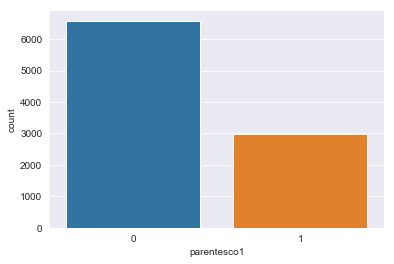

In [116]:
sb.countplot(income['parentesco1'])

### There are 6584 houses without a family head

In [117]:
income.skew()

v2a1                4.069222
hacdor              4.827256
rooms               0.492808
hacapo              6.270899
v14a              -13.718759
refrig             -4.544036
v18q                1.271562
v18q1               2.388372
r4h1                2.164806
r4h2                1.232271
r4h3                0.992957
r4m1                2.118286
r4m2                1.128747
r4m3                1.090578
r4t1                1.763112
r4t2                1.159647
r4t3                1.158371
tamhog              1.160054
tamviv              1.370489
escolari            0.192121
rez_esc             2.397955
hhsize              1.160054
paredblolad        -0.382949
paredzocalo         3.154384
paredpreb           1.597085
pareddes           10.658006
paredmad            2.404459
paredzinc           8.572766
paredfibras        26.074082
paredother         26.074082
                     ...    
bedrooms            0.670163
overcrowding        1.889641
tipovivi1          -0.487975
tipovivi2     

### By looking at the skew values, we can identify that the dataset is highly skewed. This can be a measure of bias

#### To further comfirm we can visualise it


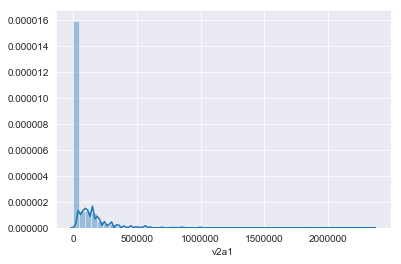

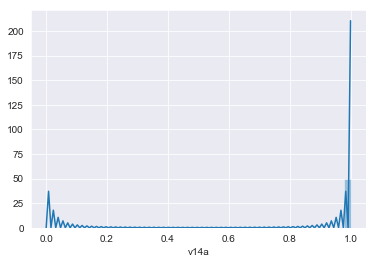

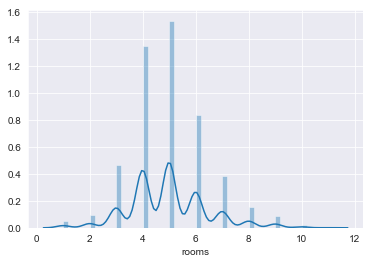

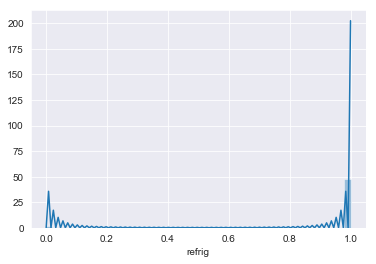

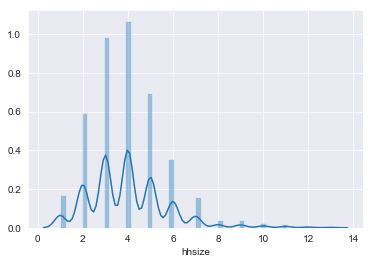

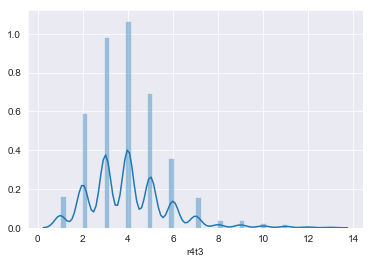

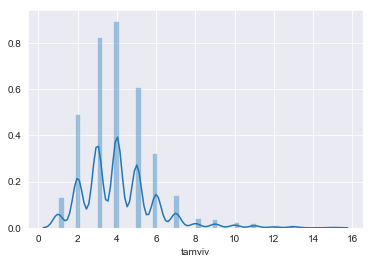

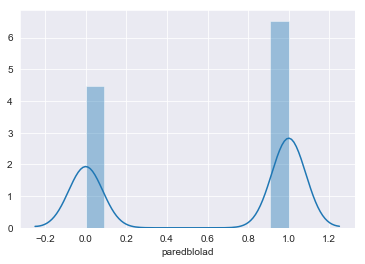

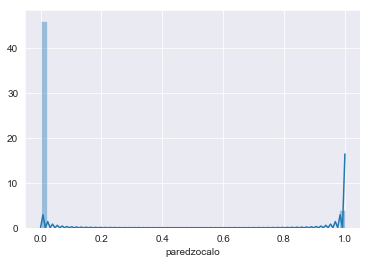

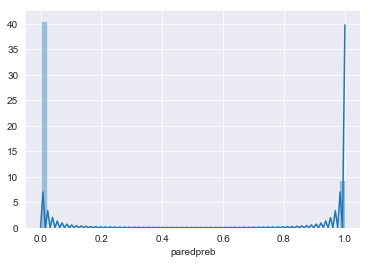

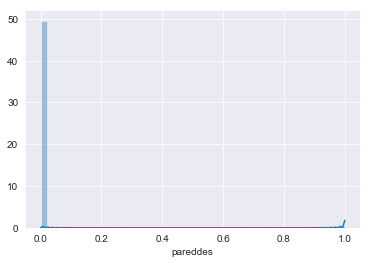

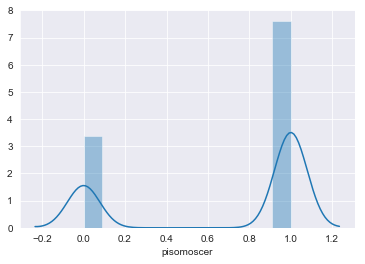

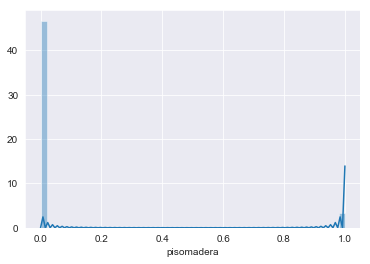

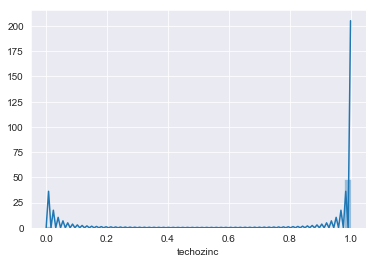

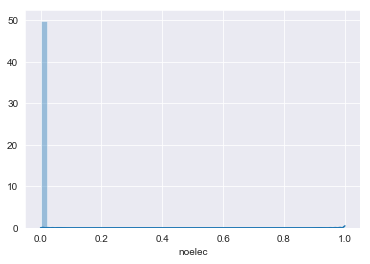

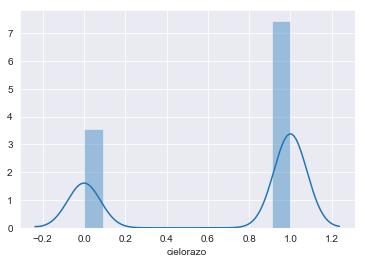

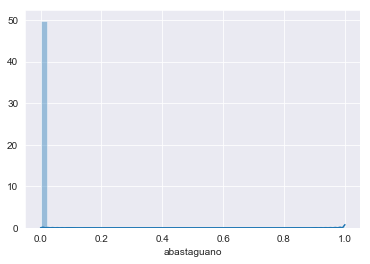

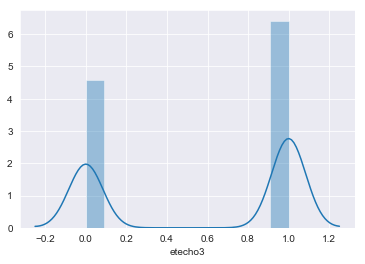

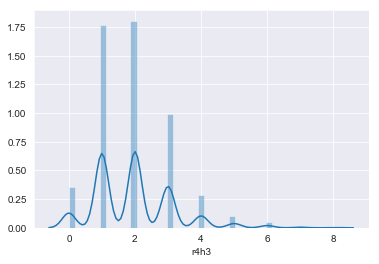

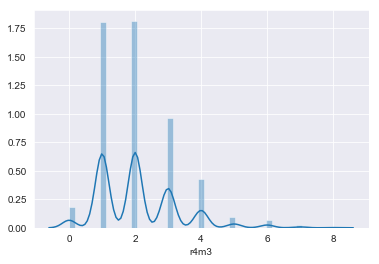

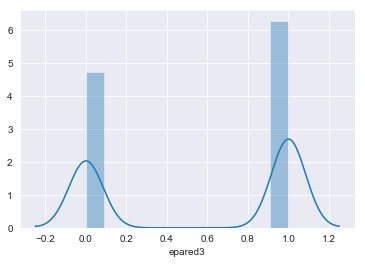

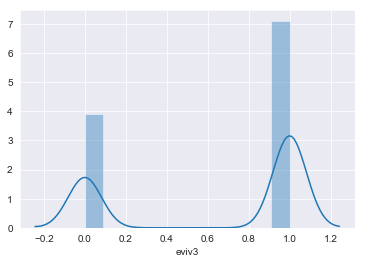

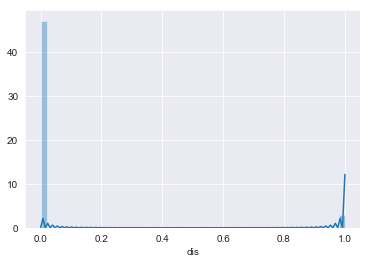

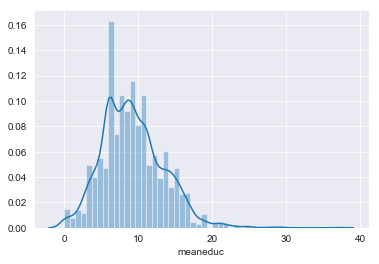

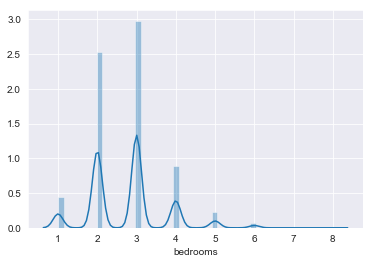

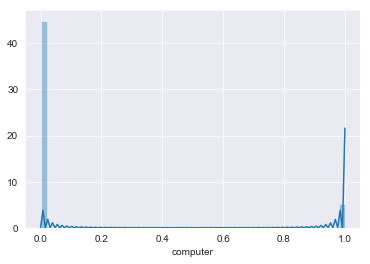

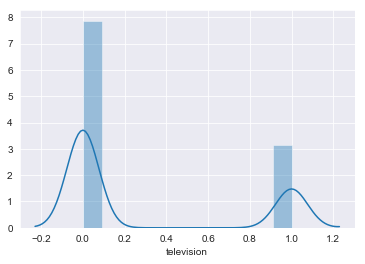

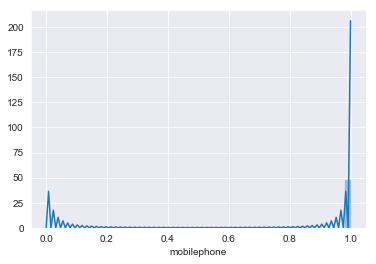

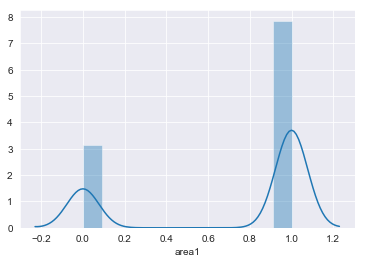

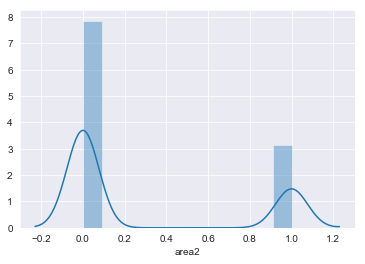

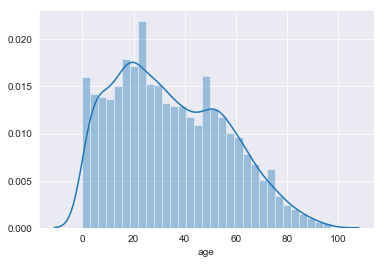

In [118]:
for i in ni.columns:
    sb.distplot(ni[i])
    plt.show()

### We can also study the target column to draw inferences on biasness

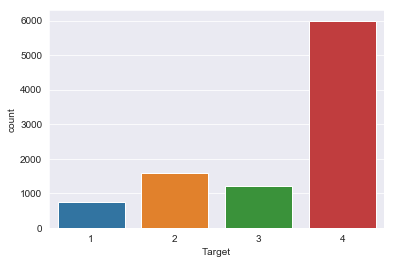

In [129]:
sb.countplot(income['Target'])

### As seen the data is biased towards category 4

In [119]:
ni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 31 columns):
v2a1           9557 non-null float64
v14a           9557 non-null int64
rooms          9557 non-null int64
refrig         9557 non-null int64
hhsize         9557 non-null int64
r4t3           9557 non-null int64
tamviv         9557 non-null int64
paredblolad    9557 non-null int64
paredzocalo    9557 non-null int64
paredpreb      9557 non-null int64
pareddes       9557 non-null int64
pisomoscer     9557 non-null int64
pisomadera     9557 non-null int64
techozinc      9557 non-null int64
noelec         9557 non-null int64
cielorazo      9557 non-null int64
abastaguano    9557 non-null int64
etecho3        9557 non-null int64
r4h3           9557 non-null int64
r4m3           9557 non-null int64
epared3        9557 non-null int64
eviv3          9557 non-null int64
dis            9557 non-null int64
meaneduc       9557 non-null float64
bedrooms       9557 non-null int64
computer      

In [121]:
ni.describe()

,v2a1,v14a,rooms,refrig,hhsize,r4t3,tamviv,paredblolad,paredzocalo,paredpreb,...,eviv3,dis,meaneduc,bedrooms,computer,television,mobilephone,area1,area2,age
count,9.557000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,4.662861e+04,0.994768,4.955530,0.957623,3.999058,4.005964,4.094590,0.594015,0.077744,0.188030,...,0.646123,0.057549,9.231523,2.739981,0.102124,0.284608,0.975306,0.714555,0.285445,34.303547
std,1.091671e+05,0.072145,1.468381,0.201459,1.772216,1.771202,1.876428,0.491107,0.267782,0.390756,...,0.478197,0.232902,4.166603,0.944507,0.302827,0.451251,0.155199,0.451650,0.451650,21.612261
min,0.000000e+00,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,1.000000,4.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,17.000000
50%,0.000000e+00,1.000000,5.000000,1.000000,4.000000,4.000000,4.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,9.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000
75%,4.500000e+04,1.000000,6.000000,1.000000,5.000000,5.000000,5.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,11.500000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,51.000000
max,2.353477e+06,1.000000,11.000000,1.000000,13.000000,13.000000,15.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,37.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,97.000000


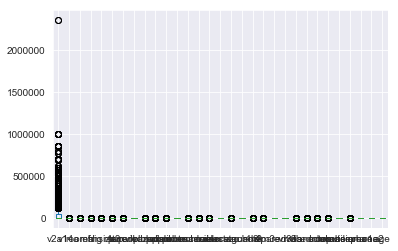

In [122]:
ni.plot(kind='box')

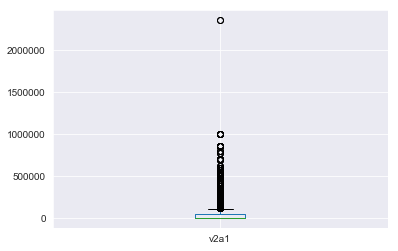

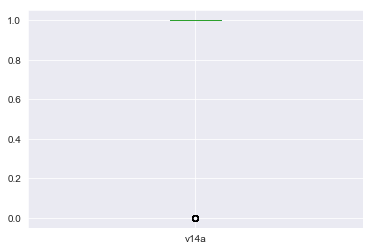

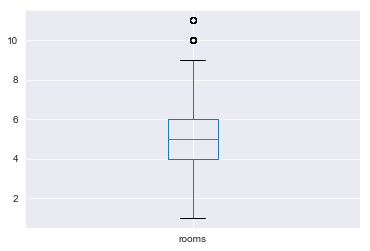

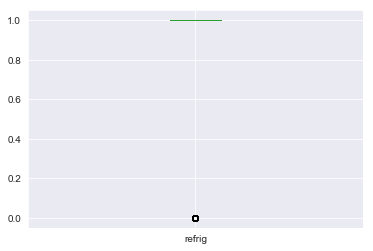

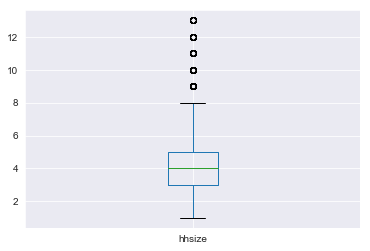

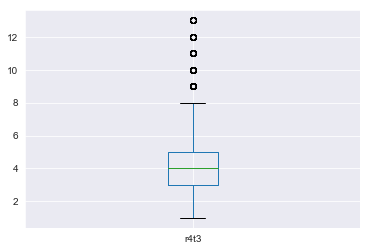

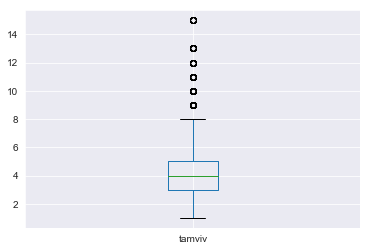

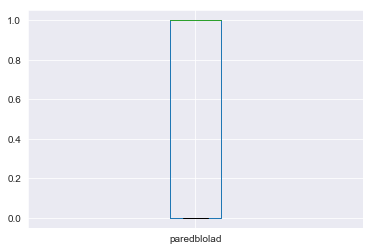

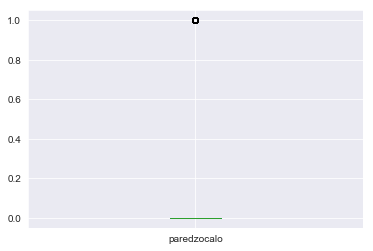

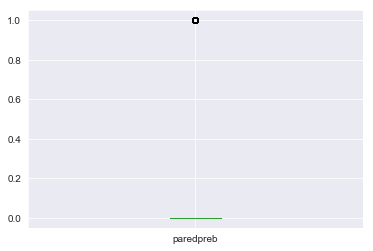

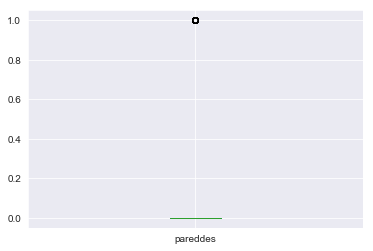

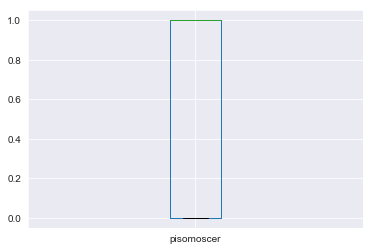

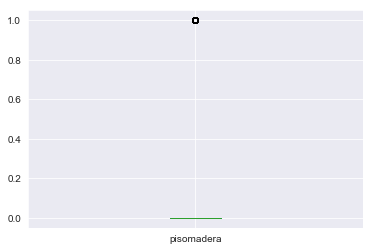

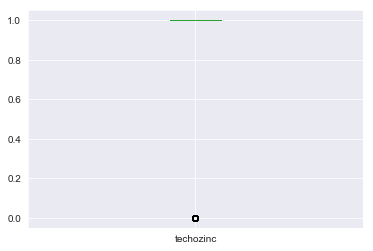

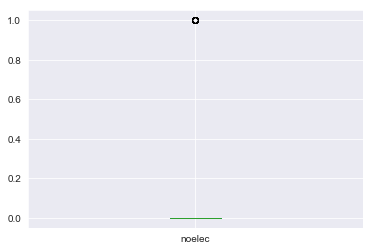

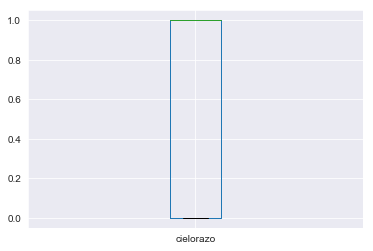

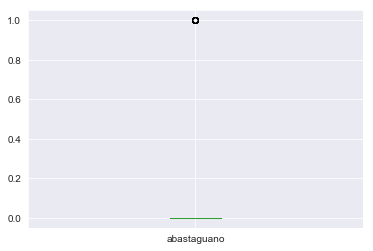

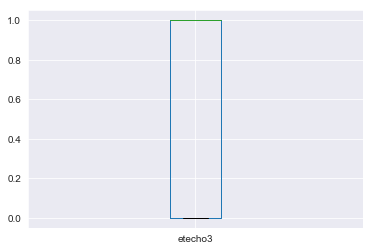

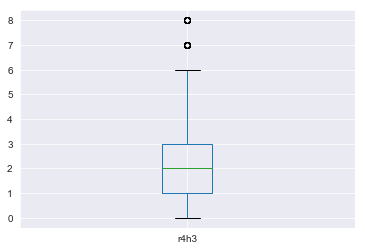

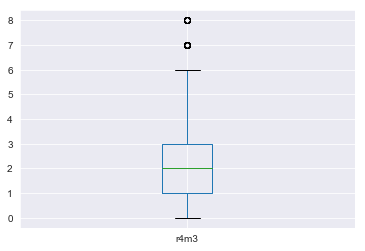

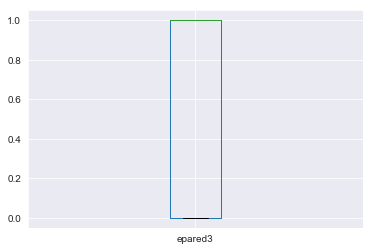

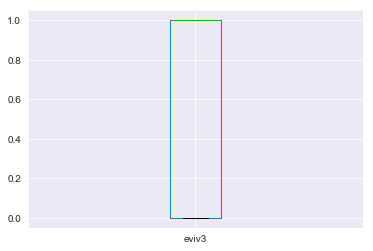

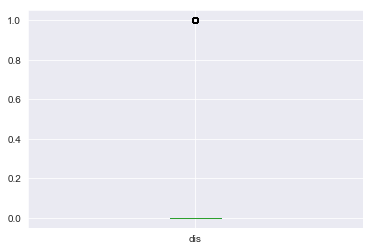

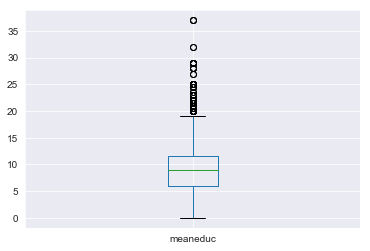

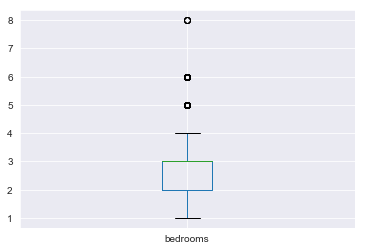

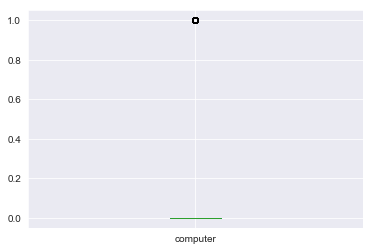

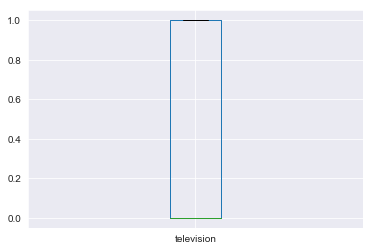

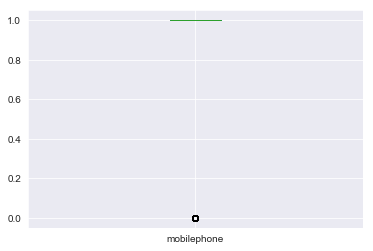

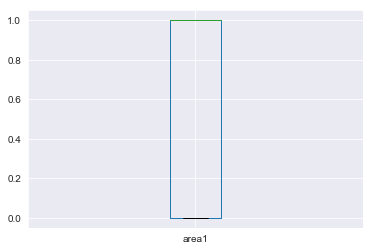

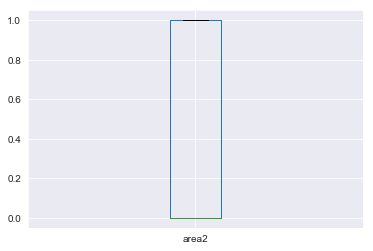

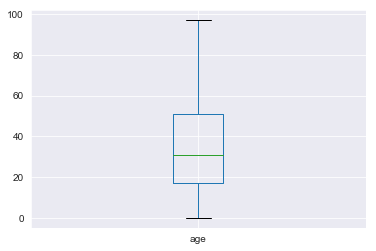

In [123]:
for i in ni.columns:
    ni[i].plot(kind='box')
    plt.show()

### As seen above there are a lot of outliers present in our feature dataset. Removing these will affect the outcome of our model so we choose to keep them for now

### Checking variance and correlation of our features

In [124]:
ni.corr()

,v2a1,v14a,rooms,refrig,hhsize,r4t3,tamviv,paredblolad,paredzocalo,paredpreb,...,eviv3,dis,meaneduc,bedrooms,computer,television,mobilephone,area1,area2,age
v2a1,1.000000,0.018355,0.101634,0.061534,-0.017778,-0.010496,-0.017097,0.165024,-0.060648,-0.079349,...,0.146585,-0.047095,0.285800,0.029684,0.133956,0.024424,0.057438,0.148049,-0.148049,-0.090771
v14a,0.018355,1.000000,0.129183,0.143143,0.007328,0.007615,0.010613,0.058186,-0.000611,0.005202,...,0.073727,-0.013219,0.035245,0.102891,0.010088,0.045742,0.053883,-0.007297,0.007297,0.027193
rooms,0.101634,0.129183,1.000000,0.130531,0.240137,0.245784,0.254473,0.260981,-0.057740,-0.151392,...,0.250314,-0.028929,0.284356,0.804070,0.243198,0.226308,0.075540,0.130286,-0.130286,0.077046
refrig,0.061534,0.143143,0.130531,1.000000,-0.026784,-0.025979,-0.022060,0.134937,-0.035913,0.022801,...,0.147383,-0.010466,0.150732,0.103223,0.060654,0.080885,0.127180,0.078661,-0.078661,0.029801
hhsize,-0.017778,0.007328,0.240137,-0.026784,1.000000,0.998107,0.943640,-0.058513,0.015149,0.005242,...,-0.070160,-0.086323,-0.020801,0.357266,-0.001186,0.042209,0.097315,0.010908,-0.010908,-0.328421
r4t3,-0.010496,0.007615,0.245784,-0.025979,0.998107,1.000000,0.945243,-0.058571,0.014467,0.004579,...,-0.067562,-0.085307,-0.019380,0.364362,-0.000355,0.043047,0.097230,0.012070,-0.012070,-0.326468
tamviv,-0.017097,0.010613,0.254473,-0.022060,0.943640,0.945243,1.000000,-0.074265,0.035346,0.003999,...,-0.099374,-0.080462,-0.038813,0.376536,-0.014424,0.051624,0.099294,0.026059,-0.026059,-0.322591
paredblolad,0.165024,0.058186,0.260981,0.134937,-0.058513,-0.058571,-0.074265,1.000000,-0.351198,-0.582085,...,0.287391,-0.018031,0.277659,0.171937,0.140899,0.112044,0.029090,0.207809,-0.207809,0.067958
paredzocalo,-0.060648,-0.000611,-0.057740,-0.035913,0.015149,0.014467,0.035346,-0.351198,1.000000,-0.139718,...,-0.131628,0.008794,-0.076901,-0.045018,-0.054042,-0.046300,-0.034377,-0.122791,0.122791,-0.003879
paredpreb,-0.079349,0.005202,-0.151392,0.022801,0.005242,0.004579,0.003999,-0.582085,-0.139718,1.000000,...,-0.003407,0.002971,-0.112444,-0.083855,-0.055287,-0.035870,0.033433,-0.086010,0.086010,-0.063970


In [125]:
ni.var()

v2a1           1.191747e+10
v14a           5.204941e-03
rooms          2.156143e+00
refrig         4.058572e-02
hhsize         3.140748e+00
r4t3           3.137156e+00
tamviv         3.520981e+00
paredblolad    2.411864e-01
paredzocalo    7.170743e-02
paredpreb      1.526905e-01
pareddes       8.507370e-03
pisomoscer     2.128540e-01
pisomadera     6.158123e-02
techozinc      2.903320e-02
noelec         2.192743e-03
cielorazo      2.185488e-01
abastaguano    3.545316e-03
etecho3        2.430446e-01
r4h3           1.413370e+00
r4m3           1.454851e+00
epared3        2.451035e-01
eviv3          2.286719e-01
dis            5.424318e-02
meaneduc       1.736058e+01
bedrooms       8.920943e-01
computer       9.170436e-02
television     2.036277e-01
mobilephone    2.408667e-02
area1          2.039876e-01
area2          2.039876e-01
age            4.670898e+02
dtype: float64

In [126]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(ni))

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [127]:
X.columns=ni.columns

In [128]:
X

,v2a1,v14a,rooms,refrig,hhsize,r4t3,tamviv,paredblolad,paredzocalo,paredpreb,...,eviv3,dis,meaneduc,bedrooms,computer,television,mobilephone,area1,area2,age
0,1.313389,0.072521,-1.331829,0.210363,-1.692353,-1.697221,-1.649279,0.826716,-0.290341,-0.481219,...,-1.351237,-0.247111,0.184447,-1.842307,-0.337253,-0.630742,0.159120,0.632039,-0.632039,0.402406
1,0.809548,0.072521,-0.650771,0.210363,-1.692353,-1.697221,-1.649279,-1.209605,-0.290341,-0.481219,...,-1.351237,-0.247111,0.664479,-1.842307,-0.337253,-0.630742,0.159120,0.632039,-0.632039,1.512945
2,-0.427153,0.072521,2.073460,0.210363,-1.692353,-1.697221,-1.649279,-1.209605,-0.290341,-0.481219,...,0.740062,4.046772,0.424463,-0.783498,-0.337253,-0.630742,-6.284565,0.632039,-0.632039,2.669756
3,1.221781,0.072521,0.030287,0.210363,0.000531,-0.003368,-0.050412,0.826716,-0.290341,-0.481219,...,0.740062,-0.247111,0.424463,0.275310,-0.337253,-0.630742,0.159120,0.632039,-0.632039,-0.800678
4,1.221781,0.072521,0.030287,0.210363,0.000531,-0.003368,-0.050412,0.826716,-0.290341,-0.481219,...,0.740062,-0.247111,0.424463,0.275310,-0.337253,-0.630742,0.159120,0.632039,-0.632039,0.124771
5,1.221781,0.072521,0.030287,0.210363,0.000531,-0.003368,-0.050412,0.826716,-0.290341,-0.481219,...,0.740062,-0.247111,0.424463,0.275310,-0.337253,-0.630742,0.159120,0.632039,-0.632039,0.171044
6,1.221781,0.072521,0.030287,0.210363,0.000531,-0.003368,-0.050412,0.826716,-0.290341,-0.481219,...,0.740062,-0.247111,0.424463,0.275310,-0.337253,-0.630742,0.159120,0.632039,-0.632039,-1.217130
7,0.763744,0.072521,-2.012887,0.210363,0.000531,-0.003368,-0.050412,0.826716,-0.290341,-0.481219,...,-1.351237,-0.247111,0.184447,-1.842307,-0.337253,-0.630742,0.159120,0.632039,-0.632039,-1.263402
8,0.763744,0.072521,-2.012887,0.210363,0.000531,-0.003368,-0.050412,0.826716,-0.290341,-0.481219,...,-1.351237,-0.247111,0.184447,-1.842307,-0.337253,-0.630742,0.159120,0.632039,-0.632039,-0.199136
9,0.763744,0.072521,-2.012887,0.210363,0.000531,-0.003368,-0.050412,0.826716,-0.290341,-0.481219,...,-1.351237,-0.247111,0.184447,-1.842307,-0.337253,-0.630742,0.159120,0.632039,-0.632039,-0.291681


In [152]:
X.shape

(9557, 31)

In [132]:
y=income.loc[:,['Target']]

In [205]:
rf=RandomForestClassifier()
model1=rf.fit(X,y)
m1=model1.score(X,y)
m1

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9973841163545045

### Testing dataset

In [135]:
testincome=pd.read_csv('C:/Users/siddharth21.TRN/Downloads/Mock_QP_-_Reg/test.csv')
testincome

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.250000,0.25,272.250000,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.250000,0.25,272.250000,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.250000,0.25,272.250000,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.000000,0.00,256.000000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.250000,64.00,NaN,324
5,ID_e77d38d45,400000.0,0,3,0,1,1,1,1.0,0,...,38,256,1444,4,0,0,1.000000,0.00,182.250000,1444
6,ID_3c5f4bd51,400000.0,0,3,0,1,1,1,1.0,0,...,42,121,1764,4,0,0,1.000000,0.00,182.250000,1764
7,ID_a849c29bd,300000.0,0,6,0,1,1,1,1.0,0,...,21,196,441,4,0,0,0.250000,0.00,196.000000,441
8,ID_472fa82da,300000.0,0,6,0,1,1,1,1.0,0,...,22,196,484,4,0,0,0.250000,0.00,196.000000,484
9,ID_24864adcc,NaN,0,6,0,1,1,0,NaN,0,...,70,100,4900,1,0,0,0.111111,64.00,100.000000,4900


### For predicting and checking accuracy we need to keep the same set of features and clean the dataset

In [139]:
n5=testincome.loc[:,['v2a1','v14a','rooms','refrig','hhsize','r4t3','tamviv','paredblolad','paredzocalo','paredpreb','pareddes','pisomoscer','pisomadera','techozinc','noelec','cielorazo','abastaguano','etecho3','r4h3','r4m3','epared3','eviv3','dis','meaneduc','bedrooms','computer','television','mobilephone',
'area1','area2','age']]


In [137]:
n5

,v2a1,v14a,rooms,refrig,hhsize,r4t3,tamviv,paredblolad,paredzocalo,paredpreb,...,eviv3,dis,meaneduc,bedrooms,computer,television,mobilephone,area1,area2,age
0,NaN,1,5,1,3,3,3,1,0,0,...,1,0,16.500000,2,1,0,1,1,0,4
1,NaN,1,5,1,3,3,3,1,0,0,...,1,0,16.500000,2,1,0,1,1,0,41
2,NaN,1,5,1,3,3,3,1,0,0,...,1,0,16.500000,2,1,0,1,1,0,41
3,NaN,1,14,1,1,1,1,1,0,0,...,1,0,16.000000,1,1,0,1,1,0,59
4,175000.0,1,4,1,1,1,1,1,0,0,...,1,0,NaN,2,0,0,1,1,0,18
5,400000.0,1,3,1,2,2,2,1,0,0,...,1,0,13.500000,2,1,0,1,1,0,38
6,400000.0,1,3,1,2,2,2,1,0,0,...,1,0,13.500000,2,1,0,1,1,0,42
7,300000.0,1,6,1,2,2,2,1,0,0,...,1,0,14.000000,4,0,0,1,1,0,21
8,300000.0,1,6,1,2,2,2,1,0,0,...,1,0,14.000000,4,0,0,1,1,0,22
9,NaN,1,6,1,1,1,1,1,0,0,...,1,0,10.000000,3,0,1,1,1,0,70


In [207]:
#removing null values
n5.isnull().sum()

v2a1           0
v14a           0
rooms          0
refrig         0
hhsize         0
r4t3           0
tamviv         0
paredblolad    0
paredzocalo    0
paredpreb      0
pareddes       0
pisomoscer     0
pisomadera     0
techozinc      0
noelec         0
cielorazo      0
abastaguano    0
etecho3        0
r4h3           0
r4m3           0
epared3        0
eviv3          0
dis            0
meaneduc       0
bedrooms       0
computer       0
television     0
mobilephone    0
area1          0
area2          0
age            0
dtype: int64

In [145]:
n5['v2a1'].fillna(0,inplace=True)

In [146]:
n5['meaneduc'].mean()

9.157474336917822

In [147]:
n5['meaneduc'].fillna((n5['meaneduc'].mean()),inplace=True)

In [148]:
n5.isnull().sum()

v2a1           0
v14a           0
rooms          0
refrig         0
hhsize         0
r4t3           0
tamviv         0
paredblolad    0
paredzocalo    0
paredpreb      0
pareddes       0
pisomoscer     0
pisomadera     0
techozinc      0
noelec         0
cielorazo      0
abastaguano    0
etecho3        0
r4h3           0
r4m3           0
epared3        0
eviv3          0
dis            0
meaneduc       0
bedrooms       0
computer       0
television     0
mobilephone    0
area1          0
area2          0
age            0
dtype: int64

In [151]:
n5.shape

(23856, 31)

### We are taking the same shape of 9557 rows of training dataset for predicting testing data 

In [164]:
nn5=n5.head(9557)

In [208]:
#predictions
n5p=pd.DataFrame(model1.predict(n5))

In [156]:
n5p

,0
0,4
1,4
2,4
3,4
4,4
5,4
6,4
7,4
8,4
9,4


In [158]:
n5p[0].value_counts()

4    14884
3     8972
Name: 0, dtype: int64

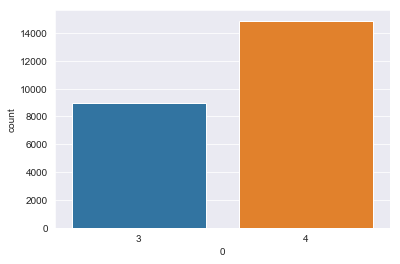

In [170]:
sb.countplot(n5p[0])

### As seen above RandomForest model has predicted the output variable 'Target' for the testing dataset

### The predictions are 14884 for category 4 and 8972 for category 3 while no category 1 and 2 has been predicted 

In [206]:
score=model1.score(nn5,y)
score

0.39311499424505597